[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NU-MSE-LECTURES/465_Computational_Microscopy_2026/blob/dev/Week_01/assignments/assignment_01_setup.ipynb)

# Assignment 1: Environment Setup and Python Basics
**Due Date:** January 12, 2026

## Instructions
1.  Complete the tasks in the cells below.
2.  Ensure all code runs without errors.
3.  Submit your completed notebook via Canvas (or GitHub if instructed).

## Task 1: Environment Verification

Write a Python script to:
1.  Import `sys`, `numpy`, and `matplotlib`.
2.  Print the Python version.
3.  Print the versions of `numpy` and `matplotlib`.

In [41]:
# Your code here

# Core imports cell
import numpy as np
import scipy
import matplotlib.pyplot as plt

import hyperspy.api as hs
import py4DSTEM

print("All core imports succeeded.")


print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

All core imports succeeded.
Python version: 3.10.15 | packaged by conda-forge | (main, Oct 16 2024, 01:24:20) [Clang 17.0.6 ]
NumPy version: 1.26.4
Matplotlib version: 3.10.7


In [42]:
# Environment documentation + version check (run this cell)
import sys
import platform
import importlib

print("OS:", platform.platform())
print("Python:", sys.version)

def show_version(module_name: str):
    try:
        mod = importlib.import_module(module_name)
        ver = getattr(mod, "__version__", "unknown")
        print(f"{module_name}: {ver}")
        return True
    except Exception as e:
        print(f"{module_name}: NOT AVAILABLE ({e.__class__.__name__}: {e})")
        return False

# Versions of key packages
show_version("numpy")
show_version("scipy")
show_version("matplotlib")
show_version("hyperspy")
show_version("py4DSTEM")

OS: macOS-15.6.1-arm64-arm-64bit
Python: 3.10.15 | packaged by conda-forge | (main, Oct 16 2024, 01:24:20) [Clang 17.0.6 ]
numpy: 1.26.4
scipy: 1.15.3
matplotlib: 3.10.7
hyperspy: 2.3.0
py4DSTEM: 0.14.18


True

## Task 2: Automate Project Structure

Write a Python script using `os` or `pathlib` to programmatically create the following directory structure inside a folder named `assignment_01_output`:
```
assignment_01_output/
├── data/
│   ├── raw/
│   └── processed/
├── figures/
└── src/
```

In [43]:
# Your code here
import os

base_dir = "assignment_01_output"
subdirs = [
    "data/raw",
    "data/processed",
    "figures",
    "src"
]

for subdir in subdirs:
    path = os.path.join(base_dir, subdir)
    os.makedirs(path, exist_ok=True)
    print(f"Created directory: {path}")

Created directory: assignment_01_output/data/raw
Created directory: assignment_01_output/data/processed
Created directory: assignment_01_output/figures
Created directory: assignment_01_output/src


## Task 3: Ensure Reproducibility

Demonstrate reproducibility by:
1.  Setting a random seed using `numpy.random.seed()`.
2.  Generating an array of 5 random numbers.
3.  Printing the array.
4.  Run the cell multiple times to verify that the numbers remain the same.

In [44]:
# Your code here
import numpy as np

# Set the seed
np.random.seed(42)

# Generate random numbers
random_numbers = np.random.rand(5)
print(f"Random numbers: {random_numbers}")

Random numbers: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


In [45]:
# Check where we are

import os
print(os.getcwd())
print(os.listdir())

/Users/kylexu/Desktop/matsci465_project/HW1
['.DS_Store', 'assignment_01_output', 'assignment_01_setup.ipynb', '.ipynb_checkpoints']


<Signal2D, title: , dimensions: (|503, 503)>
Shape:<Axes manager, axes: (|503, 503)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
---------------- | ------ | ------ | ------- | ------- | ------ 
           width |    503 |      0 |      -0 |       1 | <undefined> 
          height |    503 |      0 |      -0 |       1 | <undefined> 


The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.


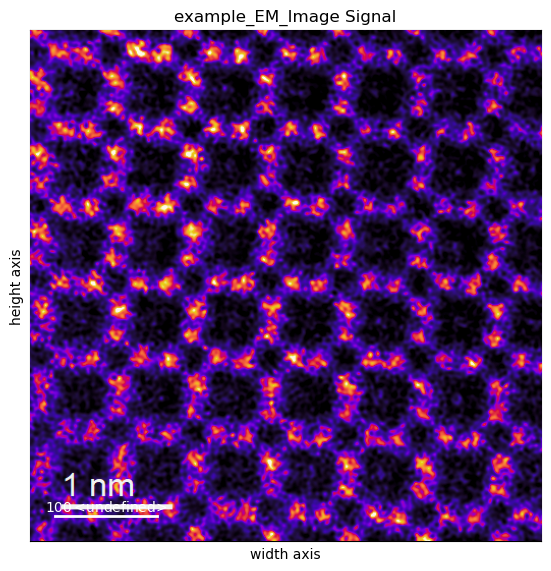

In [46]:
# Load Dataset

import hyperspy.api as hs
signal = hs.load("assignment_01_output/data/raw/example_EM_Image.tif")
print(signal)
print(f"Shape:{signal.axes_manager}")
signal.plot()

Mean intensity: 39.960
Std intensity:  37.039
Min intensity:  0.000
Max intensity:  249.486


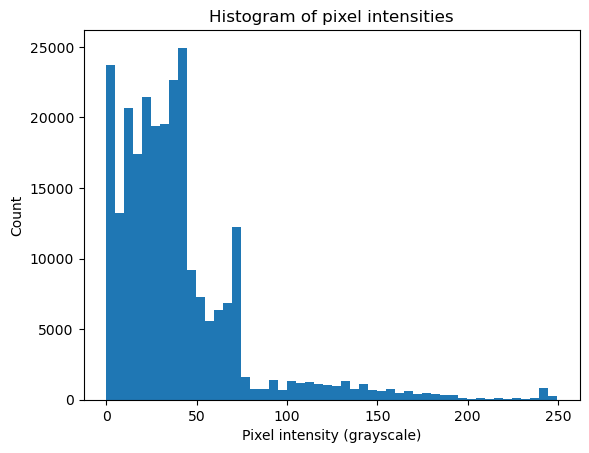

In [47]:
# Statics in Grey Scale Using matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Convert structured RGB -> grayscale intensity
R = signal.data["R"].astype(float)
G = signal.data["G"].astype(float)
B = signal.data["B"].astype(float)
gray = 0.299*R + 0.587*G + 0.114*B   # shape (H, W)

# Basic statistics
mean_intensity = gray.mean()
std_intensity = gray.std()
min_intensity = gray.min()
max_intensity = gray.max()

print(f"Mean intensity: {mean_intensity:.3f}")
print(f"Std intensity:  {std_intensity:.3f}")
print(f"Min intensity:  {min_intensity:.3f}")
print(f"Max intensity:  {max_intensity:.3f}")

# Histogram of pixel intensities
plt.figure()
plt.hist(gray.ravel(), bins=50)
plt.xlabel("Pixel intensity (grayscale)")
plt.ylabel("Count")
plt.title("Histogram of pixel intensities")
plt.show()

mean: 39.95973609239198
std:  37.03853241909996
max:  249.486
min:  0.0


The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.


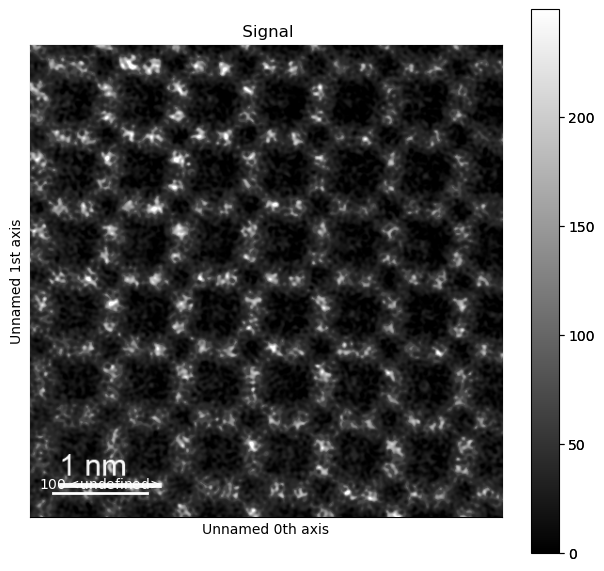

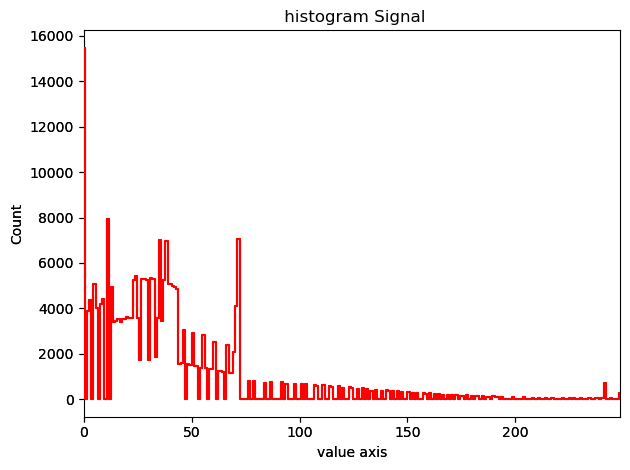

In [48]:
# Statics in Grey Scale Using hyperspy only

import hyperspy.api as hs
import numpy as np

signal = hs.load("assignment_01_output/data/raw/example_EM_Image.tif")

data = signal.data

if data.dtype.fields is not None and all(k in data.dtype.fields for k in ["R", "G", "B"]):
    R = data["R"].astype(float)
    G = data["G"].astype(float)
    B = data["B"].astype(float)
    intensity = 0.299 * R + 0.587 * G + 0.114 * B  # grayscale intensity
    sig_int = hs.signals.Signal2D(intensity)
else:
    sig_int = signal  # already single-channel

arr = sig_int.data.astype(float)
print("mean:", arr.mean())
print("std: ", arr.std())
print("max: ", arr.max())
print("min: ", arr.min())

sig_int.plot()

# Histogram
hist = sig_int.get_histogram()  
hist.plot()

## Analysis
Most of the pixels are clustered at low grayscale values (roughly 0–60), so the image is dominated by a darker background. The distribution is strongly right-skewed, with a long tail reaching up to around 250, which means there are relatively few pixels that are much brighter than the rest. In other words, the image contains a small number of bright features sitting on a mostly dark field, and the small bump near the highest intensities likely corresponds to a handful of very bright (possibly near-saturated) pixels.